# Key Data Figures from the Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load edge list
file = '../data/output/Email_Network_Stats.xlsx'
stats_list = pd.read_excel(file) 

In [3]:
stats_list.set_index('Senders')

,Degree,Neighbour Degree,Clustering,Eccentricity,Degree Centrality,Closeness,Betweeness,RandomWalk
Senders,,,,,,,,
1,30,23.333333,0.227586,5,0.026502,0.349707,0.008363,0.014746
2,23,20.347826,0.292490,5,0.020318,0.327073,0.007507,0.013986
3,38,25.236842,0.196302,5,0.033569,0.366699,0.010189,0.016865
4,22,21.500000,0.264069,6,0.019435,0.326696,0.005032,0.011600
5,10,20.500000,0.088889,6,0.008834,0.315496,0.001348,0.005587
...,...,...,...,...,...,...,...,...
1129,1,5.000000,0.000000,7,0.000883,0.200319,0.000000,0.000000
1130,1,3.000000,0.000000,7,0.000883,0.200106,0.000000,0.000000
1131,1,4.000000,0.000000,7,0.000883,0.185513,0.000000,0.000000


In [4]:
# Degree Visualization

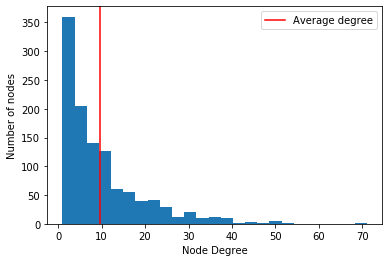

In [5]:
num_bins=25
plt.hist(stats_list['Degree'], num_bins)
plt.axvline(x=stats_list['Degree'].mean(), color='red', label='Average degree')
plt.legend(loc='upper right')
plt.xlabel('Node Degree')
plt.ylabel('Number of nodes')

file='../image/Email_degree.png'
plt.savefig(file, bbox_inches='tight', dpi=200)
plt.show()

In [6]:
# Top 15 most connected people
top_people=stats_list.sort_values(by='Degree', ascending=False).head(15)

In [7]:
top_people.set_index('Senders')

,Degree,Neighbour Degree,Clustering,Eccentricity,Degree Centrality,Closeness,Betweeness,RandomWalk
Senders,,,,,,,,
105,71,21.309859,0.105030,5,0.062721,0.378216,0.036931,0.034088
333,52,20.750000,0.070890,5,0.045936,0.382820,0.039490,0.033169
42,51,22.235294,0.102745,5,0.045053,0.377585,0.026024,0.027986
23,51,19.823529,0.060392,5,0.045053,0.381659,0.033463,0.031293
16,51,22.098039,0.145882,5,0.045053,0.346601,0.017843,0.024718
41,49,19.591837,0.076531,5,0.043286,0.374959,0.026499,0.028407
196,47,21.574468,0.135060,5,0.041519,0.358001,0.019789,0.022636
233,45,17.977778,0.049495,5,0.039753,0.373351,0.027717,0.028422
76,43,20.186047,0.078627,5,0.037986,0.374339,0.030118,0.028511


In [8]:
# Assortativity

In [9]:
df_assort= stats_list[['Senders','Degree','Neighbour Degree']]
df_assort.set_index('Senders')

,Degree,Neighbour Degree
Senders,,
1,30,23.333333
2,23,20.347826
3,38,25.236842
4,22,21.500000
5,10,20.500000
...,...,...
1129,1,5.000000
1130,1,3.000000
1131,1,4.000000


In [10]:
df_assort_av=pd.DataFrame(df_assort['Neighbour Degree'].groupby(df_assort['Degree']).mean())

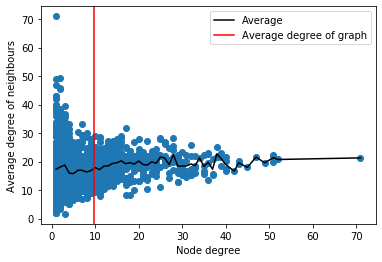

In [11]:
file='../image/Email_assortativity.png'
plt.scatter(df_assort['Degree'], df_assort['Neighbour Degree'])
plt.plot(df_assort_av.index, df_assort_av['Neighbour Degree'], color='black', label='Average')
plt.axvline(x=stats_list['Degree'].mean(), color='red', label='Average degree of graph')
plt.xlabel('Node degree')
plt.ylabel('Average degree of neighbours')
plt.legend(loc='upper right')
plt.savefig(file, bbox_inches='tight', dpi=200)
plt.show()

In [12]:
#Clustering

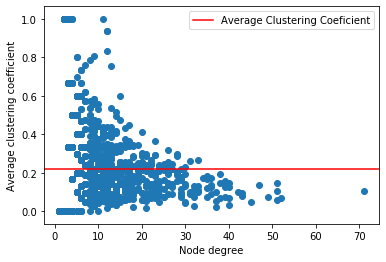

In [13]:
df_cluster_node= stats_list[['Senders','Degree','Clustering']]
df_assort.set_index('Senders')

plt.axhline(y=stats_list['Clustering'].mean(), color='red', label='Average Clustering Coeficient')
plt.legend(loc='upper right')

file='../image/Email_clustering.png'
plt.scatter(df_cluster_node['Degree'], df_cluster_node['Clustering'])
plt.xlabel('Node degree')
plt.ylabel('Average clustering coefficient')
plt.savefig(file, bbox_inches='tight', dpi=200)
plt.show()

Check --> probably due to stuctural reasons: different departments, chain of comand...

In [14]:
# Eccentricity

In [49]:
min_eccentricity = stats_list['Eccentricity'].min()
max_eccentricity = stats_list['Eccentricity'].max()

df_eccen_8 = len(stats_list['Senders'][stats_list['Eccentricity']==8])
df_eccen_7 = len(stats_list['Senders'][stats_list['Eccentricity']==7])
df_eccen_6 = len(stats_list['Senders'][stats_list['Eccentricity']==6])
df_eccen_5 = len(stats_list['Senders'][stats_list['Eccentricity']==5])
print(
    "ECCENTRICITY" + '\n'
        "The minimun eccentricity is: " + str(min_eccentricity) + "\n"
        "The maximum eccentricity / Diameter of the Network is: " + str(max_eccentricity) + "\n"
        "There is " + str(df_eccen_8) +" nodes with an eccentricity of 8\n"
        "There is " + str(df_eccen_7) +" nodes with an eccentricity of 7\n"
        "There is " + str(df_eccen_6) +" nodes with an eccentricity of 6\n"
        "There is " + str(df_eccen_5) +" nodes with an eccentricity of 5\n"
        "Total of nodes: " + str(df_eccen_8 + df_eccen_7 + df_eccen_6 + df_eccen_5)
    )


ECCENTRICITY
The minimun eccentricity is: 5
The maximum eccentricity / Diameter of the Network is: 8
There is 4 nodes with an eccentricity of 8
There is 151 nodes with an eccentricity of 7
There is 763 nodes with an eccentricity of 6
There is 215 nodes with an eccentricity of 5
Total of nodes: 1133


In [31]:
# Centrality measures

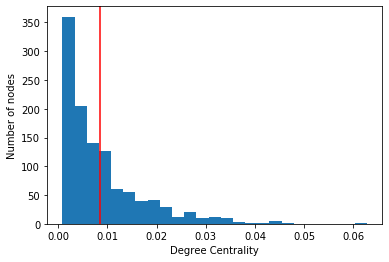

In [42]:
# Degree Centrality
deg_cent=stats_list['Degree Centrality'].mean()
num_bins=25
plt.hist(stats_list['Degree Centrality'], num_bins)
plt.axvline(x=deg_cent, color='red')
plt.xlabel('Degree Centrality')
plt.ylabel('Number of nodes')
file='../image/Email_degree_centrality.png'
plt.savefig(file, bbox_inches='tight', dpi=200)

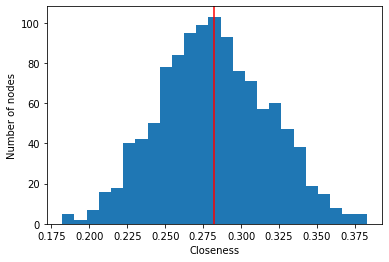

In [43]:
# Closeness Centrality
clos_cent=stats_list['Closeness'].mean()
num_bins=25
plt.hist(stats_list['Closeness'], num_bins)
plt.axvline(x=clos_cent, color='red')
plt.xlabel('Closeness')
plt.ylabel('Number of nodes')
file='../image/Email_closeness_centrality.png'
plt.savefig(file, bbox_inches='tight', dpi=200)

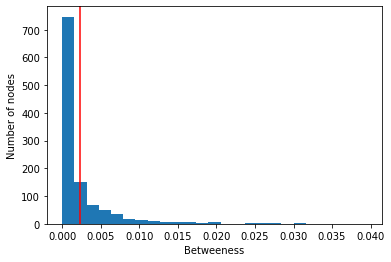

In [44]:
# Betweeness Centrality
bet_cent=stats_list['Betweeness'].mean()
num_bins=25
plt.hist(stats_list['Betweeness'], num_bins)
plt.axvline(x=bet_cent, color='red')
plt.xlabel('Betweeness')
plt.ylabel('Number of nodes')
file='../image/Email_betweeness_centrality.png'
plt.savefig(file, bbox_inches='tight', dpi=200)

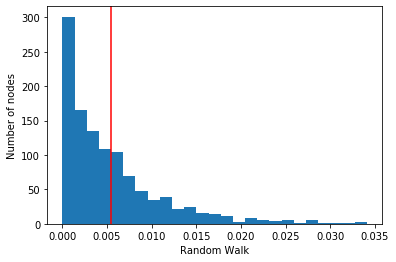

In [45]:
#Random Walk Centrality
rw_cent=stats_list['RandomWalk'].mean()
num_bins=25
plt.hist(stats_list['RandomWalk'], num_bins)
plt.axvline(x=rw_cent, color='red')
plt.xlabel('Random Walk')
plt.ylabel('Number of nodes')
file='../image/Email_RandomWalk_centrality.png'
plt.savefig(file, bbox_inches='tight', dpi=200)